# Using xarray to read EBAS data

See more at http://ebas.nilu.no/
and https://ebas.nilu.no/thredds/

requirements
pip install threddsclient

The EBAS database collects observational data on atmospheric chemical composition and physical properties from a variety of national and international research projects and monitoring programs, such as ACTRIS, AMAP, EMEP, GAW and HELCOM, as well as for the Norwegian monitoring programs funded by the Norwegian Environment Agency, the Ministry of Climate and Environment and NILU – Norwegian Institute for Air Research.

See all files available:
https://thredds.nilu.no/thredds/catalog/ebas/catalog.html

In [1]:
# You need to first install threddsclient:
import threddsclient
import xarray as xr

In [2]:
# Find url addresses for files on EBAS

all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

In [3]:
#Example 1 nephelometer scattering coefficient data
# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'nephelometer' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20100101000000.20150216111241.nephelometer..pm10.4y.1h.SE02L_TSI_3563_ZEP_dry.SE02L_scat_coef.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080708135939.20181213000000.nephelometer..aerosol_humidified.3mo.6h.CH02L_TSI_3563_ZEP_ref+TSI_3563_ZEP_wet.CH02L_hygro_tandem_neph_CorrData.lev2.nc']

In [4]:
# read multiple files
# the problem with this example is, 
#    that the files are from different instruments
#    thus, they need to be treated and digested one by one.

dsmf = xr.open_mfdataset(opendap_urls)
dsmf

<xarray.Dataset> Size: 66MB
Dimensions:                                                         (
                                                                     time: 35451,
                                                                     metadata_time: 5,
                                                                     Wavelength: 3,
                                                                     RH_base: 1,
                                                                     RH_humidified: 1,
                                                                     ...
                                                                     aerosol_light_scattering_coefficient_prec1587_qc_flags: 2,
                                                                     aerosol_light_scattering_coefficient_perc8413_qc_flags: 2,
                                                                     pressure_qc_flags: 2,
                                                                     aerosol_light_backscattering_coefficient_prec1587_qc_flags: 2,
                                                                     aerosol_light_backscattering_coefficient_amean_qc_flags: 2,
                                                                     aerosol_light_backscattering_coefficient_perc8413_qc_flags: 2)
Coordinates:
  * time                                                            (time) datetime64[ns] 284kB ...
  * metadata_time                                                   (metadata_time) datetime64[ns] 40B ...
  * Wavelength                                                      (Wavelength) float64 24B ...
  * RH_base                                                         (RH_base) float64 8B ...
  * RH_humidified                                                   (RH_humidified) float64 8B ...
  * RH_base_max                                                     (RH_base_max) float64 8B ...
  * RH                                                              (RH) float64 104B ...
  * Location                                                        (Location) |S64 64B ...
Dimensions without coordinates: tbnds,
                                aerosol_light_scattering_enhancement_factor_qc_flags,
                                aerosol_light_backscattering_coefficient_qc_flags,
                                aerosol_light_backscattering_enhancement_factor_qc_flags,
                                aerosol_light_scattering_coefficient_qc_flags,
                                temperature_qc_flags,
                                ...
                                aerosol_light_scattering_coefficient_prec1587_qc_flags,
                                aerosol_light_scattering_coefficient_perc8413_qc_flags,
                                pressure_qc_flags,
                                aerosol_light_backscattering_coefficient_prec1587_qc_flags,
                                aerosol_light_backscattering_coefficient_amean_qc_flags,
                                aerosol_light_backscattering_coefficient_perc8413_qc_flags
Data variables: (12/41)
    time_bnds                                                       (time, tbnds) datetime64[ns] 567kB dask.array<chunksize=(35451, 2), meta=np.ndarray>
    metadata_time_bnds                                              (metadata_time, tbnds) datetime64[ns] 80B dask.array<chunksize=(5, 2), meta=np.ndarray>
    aerosol_light_scattering_enhancement_factor_qc                  (Wavelength, RH_base, RH_humidified, aerosol_light_scattering_enhancement_factor_qc_flags, time) float64 851kB dask.array<chunksize=(3, 1, 1, 1, 35451), meta=np.ndarray>
    aerosol_light_backscattering_enhancement_factor_ebasmetadata    (Wavelength, RH_base_max, RH_humidified, metadata_time) object 120B dask.array<chunksize=(3, 1, 1, 5), meta=np.ndarray>
    aerosol_light_scattering_enhancement_factor_ebasmetadata        (Wavelength, RH_base, RH_humidified, metadata_time) object 120B dask.array<chunksize=(3


## Example 2 aerosol sulphate data 
also here - the files are differently shaped for different periods
best to read single files, analyse, and then concatenate for longer time series
note that catalogue file names give no full description of what is in a file

In [5]:

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]

# get all data urls which could contain sulphate data, exclude some
opendap_urls = [x for x in opendap_urls if 'filter_3pack' in x]
opendap_urls = [x for x in opendap_urls if not 'sum_ammonia' in x]
opendap_urls = [x for x in opendap_urls if not 'sulphur_dioxide' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20210101070000.20230314140050.filter_3pack...2y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20200101070000.20230314140946.filter_3pack...1y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20160101070000.20230314140946.filter_3pack...3y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20140101070000.20230511100226.filter_3pack.sulphate_corrected.aerosol.9y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20140101070000.20230314140946.filter_3pack.sum_nitric_acid_and_nitrate.air+aerosol.9y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20140101070000.20230314140050.filter_3pack.potassium.aerosol.7y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20140101070000.2023031414005

In [6]:
file_to_read = opendap_urls[0]
file_to_read

'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20210101070000.20230314140050.filter_3pack...2y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [7]:
ds_single_file = xr.open_dataset(file_to_read)
ds_single_file

<xarray.Dataset> Size: 183kB
Dimensions:                                  (time: 730, tbnds: 2,
                                              metadata_time: 2,
                                              ammonia_qc_flags: 1,
                                              ammonium_ug_N_per_m3_qc_flags: 1,
                                              ammonium_ug_per_m3_qc_flags: 1,
                                              calcium_qc_flags: 1,
                                              ...
                                              nitric_acid_qc_flags: 1,
                                              potassium_qc_flags: 1,
                                              sodium_qc_flags: 1,
                                              sulphate_total_ug_S_per_m3_qc_flags: 1,
                                              sulphate_total_ug_per_m3_qc_flags: 1,
                                              sulphur_dioxide_qc_flags: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 6kB 2021-0...
  * metadata_time                            (metadata_time) datetime64[ns] 16B ...
Dimensions without coordinates: tbnds, ammonia_qc_flags,
                                ammonium_ug_N_per_m3_qc_flags,
                                ammonium_ug_per_m3_qc_flags, calcium_qc_flags,
                                chloride_qc_flags, magnesium_qc_flags,
                                nitrate_ug_N_per_m3_qc_flags,
                                nitrate_ug_per_m3_qc_flags,
                                nitric_acid_qc_flags, potassium_qc_flags,
                                sodium_qc_flags,
                                sulphate_total_ug_S_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags,
                                sulphur_dioxide_qc_flags
Data variables: (12/44)
    time_bnds                                (time, tbnds) datetime64[ns] 12kB ...
    metadata_time_bnds                       (metadata_time, tbnds) datetime64[ns] 32B ...
    ammonia                                  (time) float64 6kB ...
    ammonia_qc                               (ammonia_qc_flags, time) float64 6kB ...
    ammonia_ebasmetadata                     (metadata_time) |S64 128B ...
    ammonium_ug_N_per_m3                     (time) float64 6kB ...
    ...                                       ...
    sulphate_total_ug_per_m3                 (time) float64 6kB ...
    sulphate_total_ug_per_m3_qc              (sulphate_total_ug_per_m3_qc_flags, time) float64 6kB ...
    sulphate_total_ug_per_m3_ebasmetadata    (metadata_time) |S64 128B ...
    sulphur_dioxide                          (time) float64 6kB ...
    sulphur_dioxide_qc                       (sulphur_dioxide_qc_flags, time) float64 6kB ...
    sulphur_dioxide_ebasmetadata             (metadata_time) |S64 128B ...
Attributes: (12/106)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      mass_concentration_of_nitr...
    id:                                            NO0042G.20210101070000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

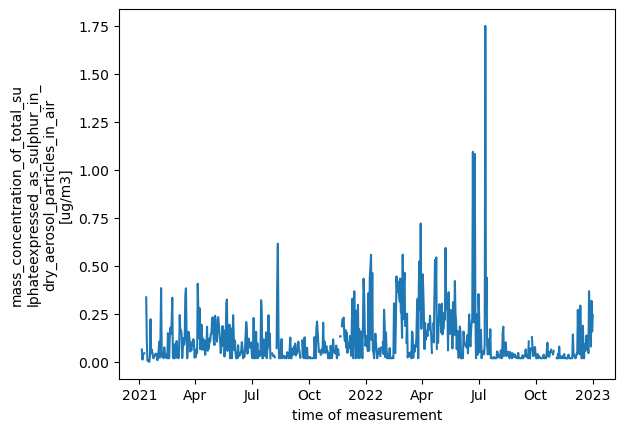

In [8]:
ds_single_file['sulphate_total_ug_S_per_m3'].plot()